# Trabajo 1: Introducción a las redes neuronales con TensorFlow y Keras

En este primer trabajo, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

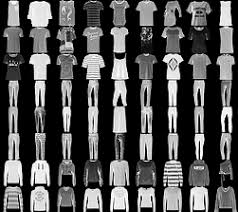

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [25]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

# Librerias añadidas
import numpy as np


Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

** Pregunta 1.1 *(0.5 puntos)* ** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [8]:
### Tu código aquí ###
### imagenes en el connunto de training
len(x_train)
x_train.shape

(60000, 28, 28)

In [9]:
### imagenes en el conjunto de test
len(x_test)
x_test.shape

(10000, 28, 28)

El número de imagenes en el conjunto de training es de 60K y en el de test de 10K.
En cuanto al tamaño de las imagenes del conjunto de training y el de test es el mismo, 28x28=784 pixeles 

**Pregunta 1.2 *(0.5 puntos)* ** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

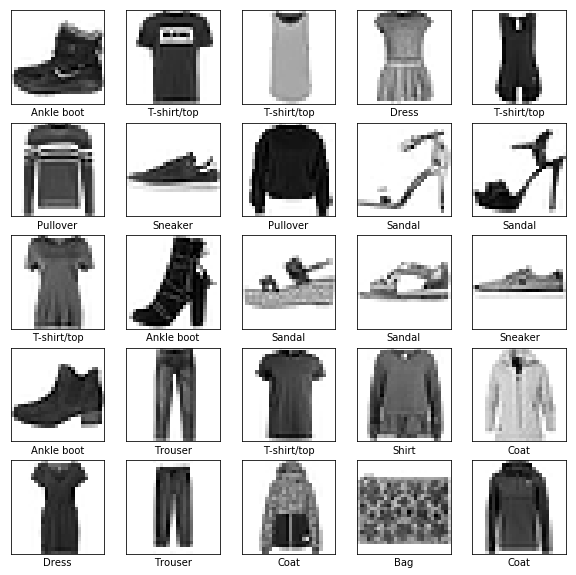

In [107]:
### Tu código aquí ###
plt.figure(figsize=(10,10))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

Las variables y_train e y_test son un array con valores númericos de 0 a 9, poco identificativos del tipo de prenda.
En una primera exploración sobre 25 registros del conjunto de test, vemos como se agregan a las distintas imagenes, el tipo de prenda a partir de la varibale Class_names de tipo lista. 

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [15]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

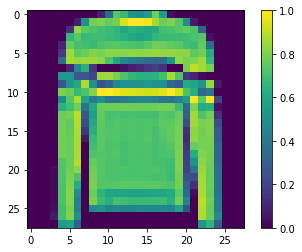

In [16]:
visualize_example(x_train[5])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(7 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [50]:
### Tu código aquí ###
#Setup de las capas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,  activation=tf.nn.sigmoid),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [89]:
#Compilación del modelo
sgd = tf.train.GradientDescentOptimizer(0.001)
model.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
#Entrenamiento del modelo
model.fit(x_train, y_train, batch_size=64, epochs=20,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1851 - acc: 0.9291 - val_loss: 0.3153 - val_acc: 0.8967
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1812 - acc: 0.9298 - val_loss: 0.3131 - val_acc: 0.8979
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1799 - acc: 0.9298 - val_loss: 0.3120 - val_acc: 0.8983
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1786 - acc: 0.9318 - val_loss: 0.3114 - val_acc: 0.8980
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1798 - acc: 0.9304 - val_loss: 0.3110 - val_acc: 0.8987
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1780 - acc: 0.9317 - val_loss: 0.3109 - val_acc: 0.8986
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1768 - acc: 0.9313 - val_loss: 0.3108 - val_acc

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(1 punto)* **. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [91]:
### Tu código aquí ###
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

### modificando el learning rate (secuencia 1= 0.5), secuencia 2=0.001, le valor de accuracy del modelo 
### mejora de 0.8949 a 0.8969 y el loss de 0.32098569467067717 a 0.304815488243103

10000/10000 [==============================] - 0s 16us/step
Test accuracy: 0.8995
Test loss: 0.3104813097834587


**Pregunta 3.2 *(1 punto)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [92]:
### Tu código aquí ###
predictions = model.predict(x_test)
predictions[0]

array([1.4628695e-12, 2.9947494e-13, 3.0640584e-11, 5.2298492e-13,
       2.4468868e-14, 1.9541767e-06, 2.4352249e-13, 5.4707521e-05,
       4.1644056e-11, 9.9994338e-01], dtype=float32)

In [93]:
###A prediction is an array of 10 numbers. 
###These describe the "confidence" of the model that the image corresponds to each of the 10 different articles
###of clothing. 
###We can see which label has the highest confidence value:

In [94]:
np.argmax(predictions[0])

9

In [95]:
y_test[0]

9

In [96]:
class_names[9]

'Ankle boot'

In [97]:
### El valor devuelto por la predicción, es una array de 10 números que nos da una idea de cuál 
### es la confianza del modelo a la hora de asociar la correspondencia de  la imagen que entra a 
### las diez clases posibles de ropa, de manera que el valor más alto en el array, se corresponde 
### con la clase con mayor predicción, en este caso "9.32101284e-06", para el primera caso (Ankel boot).

In [98]:
predictions[1]

array([7.6750405e-07, 8.7352463e-09, 9.9821341e-01, 3.0784212e-12,
       1.7812658e-03, 2.3414204e-09, 4.4819617e-06, 2.9955655e-18,
       6.2199898e-13, 2.3818115e-12], dtype=float32)

In [99]:
np.argmax(predictions[1])

2

In [100]:
y_test[1]

2

In [101]:
class_names[2]

'Pullover'

In [102]:
predictions[2]

array([7.0758670e-11, 1.0000000e+00, 2.3354513e-12, 1.5194045e-10,
       4.0665715e-10, 9.7881247e-15, 3.1515051e-12, 1.4560430e-12,
       7.6740836e-16, 1.5873080e-16], dtype=float32)

In [103]:
np.argmax(predictions[2])

1

In [104]:
y_test[2]

1

In [106]:
class_names[1]

'Trouser'

In [108]:
predictions[3]

array([1.38167654e-11, 1.00000000e+00, 1.05945244e-12, 3.24451821e-09,
       8.30790270e-10, 3.59497554e-15, 2.01237898e-12, 4.41010808e-13,
       4.85240717e-16, 4.82331960e-17], dtype=float32)

In [109]:
np.argmax(predictions[3])

1

In [110]:
y_test[3]

1

In [111]:
class_names[1]

'Trouser'